# DATA MINING 

# Application de traitment automatique des valeurs manquantes

L'application est un script Python utilisant la bibliothèque Tkinter pour créer une interface graphique (GUI) simple qui effectuer les  tâches suivant:

-le nettoyage des données

-le prétraitement (la normalisation,
                   le traitment des valeurs aberantes par la supprition ou les remplaces par NAN)
                   
-l'évaluation de modèles d'apprentissage automatique
    si le target est de type numirique on utilisant les models suivant:
            -RandomForestRegressor
            -LinearRegression
            -KNeighborsRegressor
    si le target est de type qualitatife on utilisant les models suivant:
            -RandomForestClassifier
            -LogisticRegression
            -KNeighborsClassifier
     
-affichage des données apres la prédiction

In [2]:
#import les bibliotiques necessire
import tkinter as tk #Tkinter, qui est une trousse à outils GUI standard pour Python.
from tkinter import filedialog #Un sous-module de Tkinter pour les opérations de boîte de dialogue de fichier.
import pandas as pd #stocker et manipuler efficacement de grands ensembles de données
from sklearn.metrics import silhouette_score #évaluer la qualité des clusters dans les algorithmes de clustering.
from sklearn.preprocessing import LabelEncoder #encoder des variables catégorielles en valeurs numériques.
from sklearn.model_selection import train_test_split #Divise les ensembles de données en ensembles d'entraînement et de test
from sklearn.preprocessing import StandardScaler #pour la Normalisation
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier #les arbres de dicesion
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier #KNN
from sklearn.metrics import r2_score, accuracy_score #Des métriques d'évaluation telles que le R² (valeur numerique)
from colorama import Fore, Style #pour le style d'ecriture
import numpy as np #biblio des tableux et calcule mathematique
import missingno as msno #le design graphique des donnees

In [29]:
# Fonction pour charger les données
def load_data():
    file_path= input("Enter the path to the data file (CSV format): ")
    if file_path:
        data = pd.read_csv(file_path)
        if 'id' in data.columns:
            data.drop(['id'], axis=1, inplace=True)
        return data
    else:
        print("Ce fichier n'existe pas")

In [4]:
# Fonction pour détecter les valeurs manquantes
def detect_missing_values(data):
    missing_values = data.isnull().sum()
    print(Fore.CYAN + Style.BRIGHT + "les valeurs manquentes" + Style.RESET_ALL)
    return missing_values

In [5]:
# Fonction pour afficher le types de chaque colonne
def display_attribute_types(data):
    print(Fore.CYAN + Style.BRIGHT + "Attribuet le types de dataset:" + Style.RESET_ALL)
    print(data.dtypes)

In [6]:
# Affichage grapique des donnees
def affichage(data):
    print(Fore.CYAN + Style.BRIGHT + "bar of dataset:" + Style.RESET_ALL)
    msno.bar(data)

In [8]:
# Traitement des valeurs aberantes
def treat_outliers(data, threshold=3):
    # Créez une copie du DataFrame pour éviter de modifier l'original
    data_cleaned = data.copy()

    # Parcourez chaque colonne numérique
    for col in data_cleaned.select_dtypes(include=[np.number]).columns:
        # Calculez le z-score pour chaque valeur dans la colonne
        z_scores = np.abs((data_cleaned[col] - data_cleaned[col].mean()) / data_cleaned[col].std())

        # Identifiez les indices des valeurs aberrantes
        outliers = z_scores > threshold

        # Affichez les valeurs aberrantes avant la suppression
        print(f"Outliers in column '{col}':\n{data_cleaned[col][outliers]}\n")

        # Supprimez les valeurs aberrantes du DataFrame
        data_cleaned = data_cleaned[~outliers]

    return data_cleaned

In [9]:
# Affichage des colonnes numerique
def data_number(data):
    df_num = data.select_dtypes(include=[np.number])
    print(Fore.CYAN + Style.BRIGHT + "data of numerical columns" + Style.RESET_ALL)
    return df_num
    

In [10]:
# Affichage des colonnes de type objet
def data_not_number(data):
    print(Fore.CYAN + Style.BRIGHT + "data of not numerical columns" + Style.RESET_ALL)
    df_not_num = data.select_dtypes(exclude=[np.number])
    return df_not_num

# le test des fontions de pretraitment 

In [11]:
data = load_data()
display_attribute_types(data)

Enter the path to the data file (CSV format):  dataset.csv


Attribuet le types de dataset:
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object


In [12]:
detect_missing_values(data)

les valeurs manquentes


gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                   1462
smoking_status       13292
stroke                   0
dtype: int64

bar of dataset:


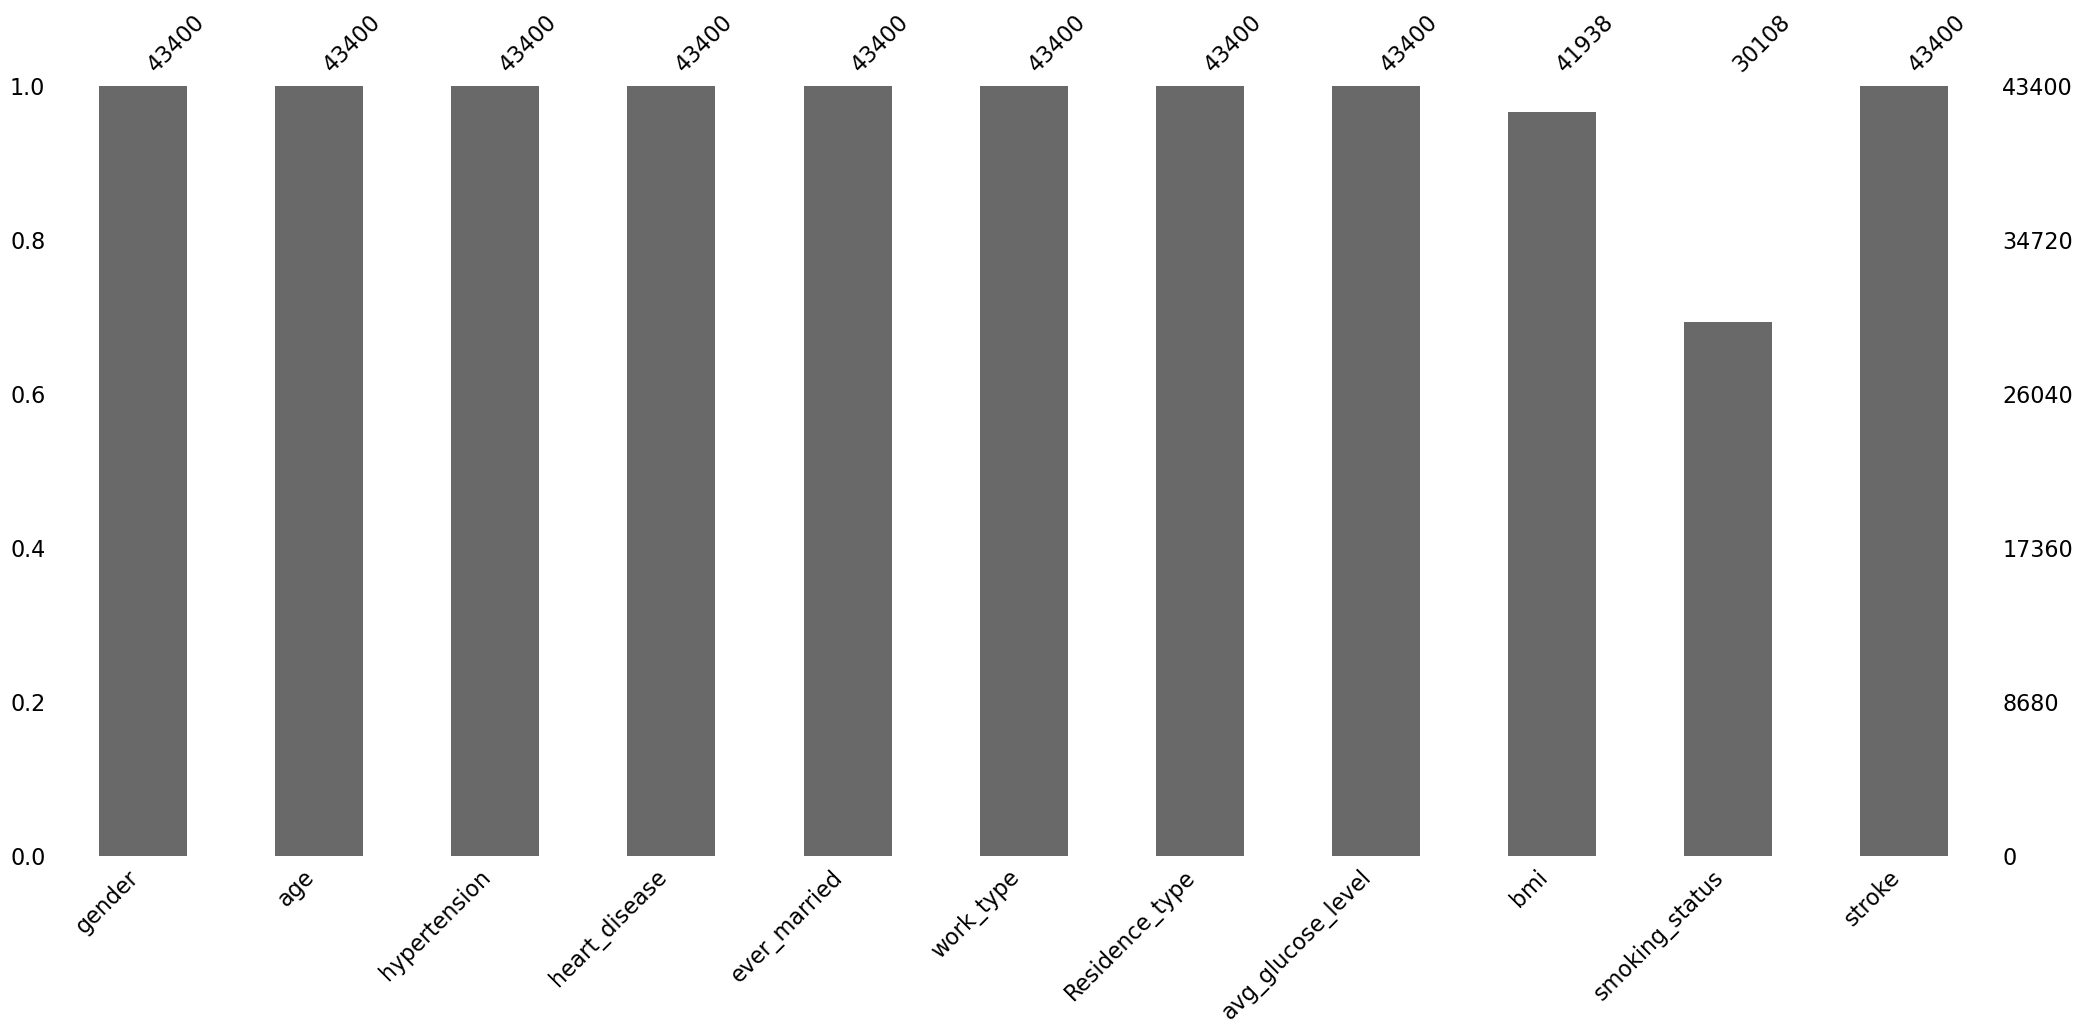

In [13]:
affichage(data)

In [14]:
# Traitement des valeurs aberrantes
data = treat_outliers(data)
# Affichez le DataFrame après le traitement
print("DataFrame après le traitement des valeurs aberrantes:")
data


Outliers in column 'age':
Series([], Name: age, dtype: float64)

Outliers in column 'hypertension':
1        1
9        1
20       1
21       1
32       1
        ..
43346    1
43351    1
43372    1
43388    1
43397    1
Name: hypertension, Length: 4061, dtype: int64

Outliers in column 'heart_disease':
7        1
11       1
19       1
63       1
67       1
        ..
43317    1
43357    1
43367    1
43379    1
43386    1
Name: heart_disease, Length: 1547, dtype: int64

Outliers in column 'avg_glucose_level':
54       242.30
58       220.49
77       234.58
83       243.50
85       229.92
          ...  
43279    242.61
43283    258.24
43287    238.23
43358    248.93
43390    229.85
Name: avg_glucose_level, Length: 1027, dtype: float64

Outliers in column 'bmi':
86       54.7
111      64.8
247      51.0
297      51.5
302      71.9
         ... 
42853    50.9
42920    51.2
43239    54.9
43355    53.2
43396    55.4
Name: bmi, Length: 351, dtype: float64

Outliers in column 'stroke':
81   

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
2,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0
5,Female,47.0,0,0,Yes,Private,Urban,210.95,50.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...
43393,Male,39.0,0,0,Yes,Private,Rural,132.22,31.6,never smoked,0
43394,Male,47.0,0,0,No,Govt_job,Urban,68.52,25.2,formerly smoked,0
43395,Female,10.0,0,0,No,children,Urban,58.64,20.4,never smoked,0
43398,Male,40.0,0,0,Yes,Private,Urban,99.16,33.2,never smoked,0


In [15]:
data_not_number(data)

data of not numerical columns


,gender,ever_married,work_type,Residence_type,smoking_status
0,Male,No,children,Rural,NaN
2,Female,No,Private,Urban,NaN
3,Female,Yes,Private,Rural,formerly smoked
4,Male,No,Never_worked,Rural,NaN
5,Female,Yes,Private,Urban,NaN
...,...,...,...,...,...
43393,Male,Yes,Private,Rural,never smoked
43394,Male,No,Govt_job,Urban,formerly smoked
43395,Female,No,children,Urban,never smoked
43398,Male,Yes,Private,Urban,never smoked


In [16]:
data_number(data)

data of numerical columns


,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,3.0,0,0,95.12,18.0,0
2,8.0,0,0,110.89,17.6,0
3,70.0,0,0,69.04,35.9,0
4,14.0,0,0,161.28,19.1,0
5,47.0,0,0,210.95,50.1,0
...,...,...,...,...,...,...
43393,39.0,0,0,132.22,31.6,0
43394,47.0,0,0,68.52,25.2,0
43395,10.0,0,0,58.64,20.4,0
43398,40.0,0,0,99.16,33.2,0


# evaluation de model qui a le plus grand score

In [17]:
# Fonction qui traite les valeurs manquents de type qualitatife
def Classification(X_train, X_test, y_train, X_testeM, y_test, data, na_column):

    
    # Encode categorical variables
    X_train_encoded = X_train.copy()
    X_test_encoded = X_test.copy()
    X_testeM_encoded = X_testeM.copy()

    # LabelEncoder est de transformer les valeurs catégoriques en valeurs numériques afin de les utiliser nos modèles
    label_encoder = LabelEncoder()

    for column in X_train.select_dtypes(include='object').columns:
        X_train_encoded[column] = label_encoder.fit_transform(X_train[column])
        X_test_encoded[column] = label_encoder.transform(X_test[column])
        X_testeM_encoded[column] = label_encoder.transform(X_testeM[column])

    models = {
        'KNeighborsClassifier': KNeighborsClassifier(),
        'Logistic Regression': LogisticRegression(),
        'Random Forest': RandomForestClassifier()
    }

    best_model = None
    best_accuracy = 0

    for name, model in models.items():
        model.fit(X_train_encoded, y_train)
        y_pred = model.predict(X_test_encoded)
        accuracy = accuracy_score(y_test, y_pred)

        print(f"\n{name}: {accuracy}")

        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_model = model
            best_name = name

    print(f"\nLe meilleur algorithm est {best_name} avec Accuracy: {best_accuracy}")
    data.loc[data[na_column].isna(), na_column] = best_model.predict(X_testeM_encoded)

In [18]:
# Fonction qui traite les valeurs manquents de type numerique
def Regression(X_train, X_test, y_train, X_testeM,y_test, data,na_column):
    
    # Effectue une régression pour remplir les valeurs manquantes dans la colonne spécifiée (na_column) du DataFrame.
    # La fonction utilise trois modèles de régression (KNeighborsRegressor, LinearRegression, RandomForestRegressor)
    # Le modèle avec le meilleur score est utilisé pour remplir les valeurs manquantes dans la colonne du Data.
    
    models = {
        'KNN': KNeighborsRegressor(),
        'Linear Regression': LinearRegression(),
        'Random Forest': RandomForestRegressor()
    }

    best_model = None
    best_r2 = 0

    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        r2 = r2_score(y_test, y_pred)

        print(f"\nR2 {name}: {r2}")

        if r2 > best_r2:
            best_r2 = r2
            best_model = model
            best_name = name

    print(f"\nLe meilleur algorithm est {best_name} avec R2: {best_r2}")
    data.loc[data[na_column].isna(), na_column] = best_model.predict(X_testeM)

In [19]:
# Transformation des valeurs de type objet a categorienne
def handle_categorical(df):
    # Create a new DataFrame to store the result
    df_encoded = df.copy()

    # Identifiez les colonnes avec des valeurs qualitatives 
    categorical_cols = [col for col in df if df[col].dtype == 'object']

    # Appliquez get_dummies uniquement aux colonnes qualitatives 
    for col in categorical_cols:
        df_encoded[col] = df_encoded[col].astype('category')
        dummy_cols = pd.get_dummies(df_encoded[col], prefix=col, dummy_na=True)
        df_encoded = pd.concat([df_encoded, dummy_cols], axis=1)
        df_encoded.drop(col, axis=1, inplace=True)

    return df_encoded



In [20]:
handle_categorical(data)

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,gender_nan,...,work_type_Self-employed,work_type_children,work_type_nan,Residence_type_Rural,Residence_type_Urban,Residence_type_nan,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,smoking_status_nan
0,3.0,0,0,95.12,18.0,0,False,True,False,False,...,False,True,False,True,False,False,False,False,False,True
2,8.0,0,0,110.89,17.6,0,True,False,False,False,...,False,False,False,False,True,False,False,False,False,True
3,70.0,0,0,69.04,35.9,0,True,False,False,False,...,False,False,False,True,False,False,True,False,False,False
4,14.0,0,0,161.28,19.1,0,False,True,False,False,...,False,False,False,True,False,False,False,False,False,True
5,47.0,0,0,210.95,50.1,0,True,False,False,False,...,False,False,False,False,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43393,39.0,0,0,132.22,31.6,0,False,True,False,False,...,False,False,False,True,False,False,False,True,False,False
43394,47.0,0,0,68.52,25.2,0,False,True,False,False,...,False,False,False,False,True,False,True,False,False,False
43395,10.0,0,0,58.64,20.4,0,True,False,False,False,...,False,True,False,False,True,False,False,True,False,False
43398,40.0,0,0,99.16,33.2,0,False,True,False,False,...,False,False,False,False,True,False,False,True,False,False


In [21]:
def data_cleaning(data):
    data_num = data.select_dtypes(include=[np.number])
    non_na_columns = data_num.loc[:, data_num.isna().sum() == 0].columns
    na_columns = list(data_num.loc[:, data_num.isna().sum() != 0].columns)
    
    for na_column in na_columns:
        X_testeM = data_num.loc[data_num[na_column].isna() == True, non_na_columns]
        data_num_1 = data_num.dropna()
        X = data_num_1.drop([na_column], axis=1)
        y = data_num_1[na_column]
        #Normalisation des donneés de X
        X_scaled = StandardScaler().fit_transform(X)

        #Transformer les donneé array qui donne la normalisation en data Frame
        x = pd.DataFrame(X_scaled, columns=X.columns)
        
        X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
        print(f"Processing numeric column: {na_column}")
        Regression(X_train, X_test, y_train, X_testeM, y_test, data, na_column)

    # data_categ = handle_missing_categorical(data)
    data_categ = data.select_dtypes(include=['object'])
    non_na_columns_categ = data_categ.loc[:, data_categ.isna().sum() == 0].columns
    na_columns_categs = list(data_categ.loc[:, data_categ.isna().sum() != 0].columns)
    
    for na_column in na_columns_categs:
        X_testeM = data_categ.loc[data_categ[na_column].isna() == True, non_na_columns_categ]
        data_categ1 = data_categ.dropna()
        X = data_categ1.drop([na_column], axis=1)
        y = data_categ1[na_column]
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
        print(f"Processing categorical column: {na_column}")
        Classification(X_train, X_test, y_train, X_testeM, y_test, data, na_column)


In [ ]:
data = load_data()
print(data) #le Dataset avant le traitement
print("----------------------------------------------------------------")
print(display_attribute_types(data))
print("----------------------------------------------------------------")
print(detect_missing_values(data))
print("----------------------------------------------------------------")
data_cleaning(data)
print("----------------------------------------------------------------")
msno.bar(data) 
print("----------------------------------------------------------------")
data #le dataset apres l'apredection des valeurs manquent par le model qu' il contient le plus grand score

Enter the path to the data file (CSV format):  dataset.csv


       gender   age  hypertension  heart_disease ever_married     work_type  \
0        Male   3.0             0              0           No      children   
1        Male  58.0             1              0          Yes       Private   
2      Female   8.0             0              0           No       Private   
3      Female  70.0             0              0          Yes       Private   
4        Male  14.0             0              0           No  Never_worked   
...       ...   ...           ...            ...          ...           ...   
43395  Female  10.0             0              0           No      children   
43396  Female  56.0             0              0          Yes      Govt_job   
43397  Female  82.0             1              0          Yes       Private   
43398    Male  40.0             0              0          Yes       Private   
43399  Female  82.0             0              0          Yes       Private   

      Residence_type  avg_glucose_level   bmi   smo

# l'interface GUI de l'application par la bibliotheque TKINTER

In [22]:
import tkinter as tk
from tkinter import filedialog, Text, Toplevel, Scrollbar 

class DataCleaningApp:
    def __init__(self, root):
        self.root = root
        self.root.title("Data Cleaning App")

        # Interface elements
        self.btn_load_data = tk.Button(root, text="Charger les données", command=self.load_data)
        self.btn_load_data.pack(pady=10)

        self.btn_clean_data = tk.Button(root, text="Nettoyer les données", command=self.clean_data)
        self.btn_clean_data.pack(pady=10)

        self.output_text = Text(root, height=10, width=80)
        self.output_text.pack(pady=10)

    def load_data(self):
        file_path = filedialog.askopenfilename(title="Sélectionner un fichier de données (CSV)", filetypes=[("Fichiers CSV", "*.csv")])
        if file_path:
            self.data = pd.read_csv(file_path)
            self.output_text.insert(tk.END, "Données chargées avec succès.\n")
        else:
            self.output_text.insert(tk.END, "Aucun fichier sélectionné.\n")

    def clean_data(self):
        if hasattr(self, 'data'):
            self.output_text.delete(1.0, tk.END)  # Clear previous output
            self.output_text.insert(tk.END, "Nettoyage des données en cours...\n")

            # Appel des fonctions de nettoyage des données
            data_cleaning(self.data)
            
            # Affichage de la nouvelle data dans une autre fenêtre
            self.show_new_data_window()

            self.output_text.insert(tk.END, "Nettoyage des données terminé.\n")

        else:
            self.output_text.insert(tk.END, "Chargez d'abord les données.\n")

    def show_new_data_window(self):
        new_data_window = Toplevel(self.root)
        new_data_window.title("Nouvelle Data Après Nettoyage")
        new_data_window.geometry("300x300")

        text_widget = Text(new_data_window, wrap="none", height=100, width=100)
        text_widget.pack(pady=10, padx=10, fill=tk.BOTH, expand=True)

        scrollbar = Scrollbar(new_data_window, command=text_widget.yview)
        scrollbar.pack(side=tk.RIGHT, fill=tk.Y)
        text_widget.config(yscrollcommand=scrollbar.set)

        text_widget.insert(tk.END, "Nouvelle data après le nettoyage :\n")
        text_widget.insert(tk.END, str(self.data) + "\n")

if __name__ == "__main__":
    root = tk.Tk()
    app = DataCleaningApp(root)
    root.mainloop()


Processing numeric column: bmi

R2 KNN: 0.15497308868318238

R2 Linear Regression: 0.14310430412731612

R2 Random Forest: 0.21064787486572734

Le meilleur algorithm est Random Forest avec R2: 0.21064787486572734
Processing categorical column: smoking_status

KNeighborsClassifier: 0.48505479907007637

Logistic Regression: 0.5288940551311857

Random Forest: 0.5288940551311857

Le meilleur algorithm est Logistic Regression avec Accuracy: 0.5288940551311857
